# Visualizing Block Cross Validation

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
from src.utils import (
    load_dataset,
    create_folds,
    standardize_data,
    generate_data,
    create_weight_matrix,
)

In [14]:
kf = 5

data_dir = "../data/durham/"
window_size = 25
data = load_dataset(data_dir, window_size)
k_folds = 5
k_folds_size = 5
folds = create_folds(data, k_folds * k_folds_size)

/Users/zdc6/mambaforge/envs/uhi/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
fold = 1

low_bound = fold * k_folds_size
upper_bound = (fold + 1) * k_folds_size
train_idx = np.where((folds < low_bound) | (folds >= upper_bound))[0]
val_idx = np.where((folds >= low_bound) & (folds < upper_bound))[0]

(215.85, 2089.15, -2033.55, -217.45)

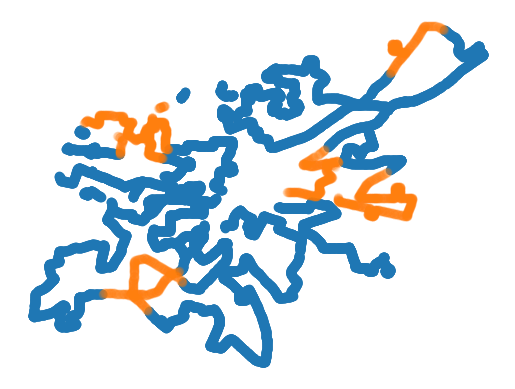

In [24]:

plt.scatter(data.coords[train_idx, 1], -data.coords[train_idx, 0], label='train')
plt.scatter(data.coords[val_idx, 1], -data.coords[val_idx, 0], label='val', alpha=0.1)
# plt.legend()
plt.axis('off')

In [19]:
# Visualizing the bootstrap approach

In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import rasterio as rio
import cartopy.crs as ccrs
import geopandas as gpd

In [21]:
temp = gpd.read_file('../data/durham/traversal/durham.shp')

In [26]:
temp.geometry.x

0       -8.776057e+06
1       -8.776073e+06
2       -8.776088e+06
3       -8.776103e+06
4       -8.776119e+06
             ...     
13872   -8.784437e+06
13873   -8.784438e+06
13874   -8.784438e+06
13875   -8.784438e+06
13876   -8.784438e+06
Length: 13877, dtype: float64

In [28]:

from sklearn.cluster import KMeans
def create_folds(data, k_folds):
    # Cluster the coordinates
    km = KMeans(n_clusters=k_folds, random_state=42)
    km.fit(data.geometry)

    # Return the labels
    return km.labels_

In [36]:
coords = np.dstack([temp.geometry.x, temp.geometry.y])

In [37]:
km = KMeans(n_clusters=50, random_state=42)

km.fit(coords.reshape(-1, 2))

/Users/zdc6/mambaforge/envs/uhi/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=50, random_state=42)

In [38]:
km.labels_

array([28, 28, 28, ..., 40, 40, 40], dtype=int32)

In [29]:
folds = create_folds(temp, 50)

TypeError: float() argument must be a string or a real number, not 'Point'

/Users/zdc6/mambaforge/envs/uhi/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
/Users/zdc6/mambaforge/envs/uhi/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


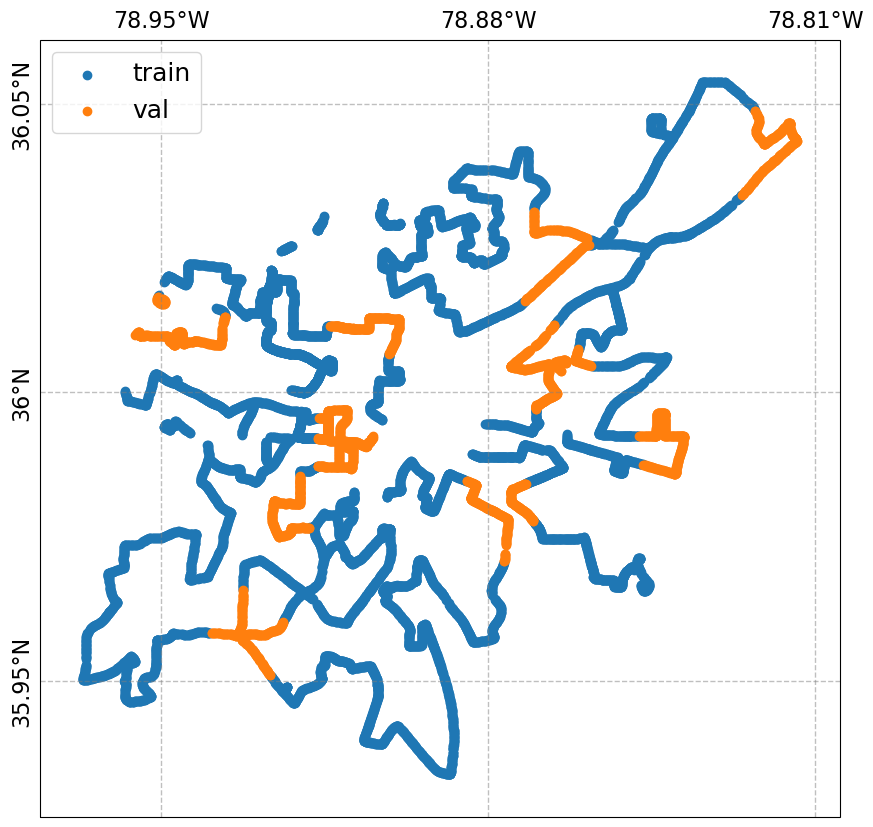

In [52]:
# First, visualize the temperature dataset
# plt.figure(figsize=(10,10))
# Import mticket
import matplotlib.ticker as mticker


base_path = '../data/durham/'
with rio.open(os.path.join(base_path, 'durham_temp.tif')) as src:
    bounds = src.bounds

fig = plt.figure(figsize=(10,10))
img_extent = (bounds.left, bounds.right, bounds.bottom, bounds.top)

ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ccrs.epsg(3857))#, extent=img_extent)

# ax = plt.axes(projection=ccrs.epsg(3857))#, extent=img_extent)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--', ylabel_style={'size': 16, 'rotation': 'vertical'}, xlabel_style={'size': 16})
# Remove edge effects for a better visual
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator([-78.95, -78.88, -78.81])
gl.ylocator = mticker.FixedLocator([35.95, 36, 36.05])
# temp = temp.to_crs(epsg=4326)
ax.scatter(temp.geometry.x[km.labels_ < 40], temp.geometry.y[km.labels_ < 40], label='train')
ax.scatter(temp.geometry.x[km.labels_ >= 40], temp.geometry.y[km.labels_ >= 40], label='val')
plt.legend(fontsize=18)
# cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.03])

# cbar = fig.colorbar(ig, cax=cbar_ax, orientation='horizontal')#, pad=0.05, shrink=0.8)
# cbar.ax.tick_params(labelsize=16)
# cbar.ax.set_xlabel(fontsize=24)
ax.set_xlim(bounds.left+2000, bounds.right-2000)
ax.set_ylim(bounds.bottom+2000, bounds.top-2000)
# plt.xlabel('Longitude', fontsize=24)
# plt.ylabel('Latitude', fontsize=24)

# Save the figure
plt.savefig('../results/Figures/block_vc.png', dpi=300, bbox_inches='tight')

/Users/zdc6/mambaforge/envs/uhi/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
/Users/zdc6/mambaforge/envs/uhi/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


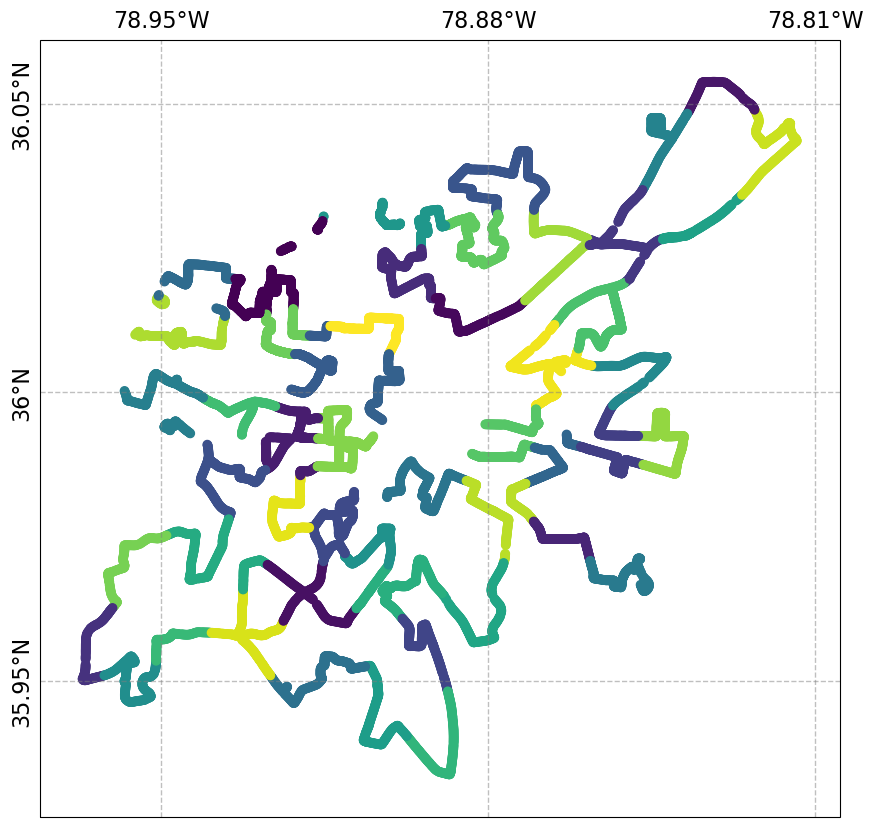

In [54]:
# First, visualize the temperature dataset
# plt.figure(figsize=(10,10))
# Import mticket
import matplotlib.ticker as mticker


base_path = '../data/durham/'
with rio.open(os.path.join(base_path, 'durham_temp.tif')) as src:
    bounds = src.bounds

fig = plt.figure(figsize=(10,10))
img_extent = (bounds.left, bounds.right, bounds.bottom, bounds.top)

ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ccrs.epsg(3857))#, extent=img_extent)

# ax = plt.axes(projection=ccrs.epsg(3857))#, extent=img_extent)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--', ylabel_style={'size': 16, 'rotation': 'vertical'}, xlabel_style={'size': 16})
# Remove edge effects for a better visual
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator([-78.95, -78.88, -78.81])
gl.ylocator = mticker.FixedLocator([35.95, 36, 36.05])
# temp = temp.to_crs(epsg=4326)
ax.scatter(temp.geometry.x, temp.geometry.y, c=km.labels_) #label='train')
# ax.scatter(temp.geometry.x[km.labels_ >= 40], temp.geometry.y[km.labels_ >= 40], label='val')
# plt.legend(fontsize=18)
# cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.03])

# cbar = fig.colorbar(ig, cax=cbar_ax, orientation='horizontal')#, pad=0.05, shrink=0.8)
# cbar.ax.tick_params(labelsize=16)
# cbar.ax.set_xlabel(fontsize=24)
ax.set_xlim(bounds.left+2000, bounds.right-2000)
ax.set_ylim(bounds.bottom+2000, bounds.top-2000)
# plt.xlabel('Longitude', fontsize=24)
# plt.ylabel('Latitude', fontsize=24)

# Save the figure
plt.savefig('../results/Figures/kmeans_labels.png', dpi=300, bbox_inches='tight')